<a href="https://colab.research.google.com/github/vivsarraf/Project-4/blob/Ajunjee/Project_4_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#  Import and read the csv.
import pandas as pd
sales_data_df = pd.read_csv("cleaned-property-sales-data.csv")
sales_data_df.head()

,Bdrms,Baths_total,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,4,2,1182,33541,2023-12-15,2023,12,160000
1,3,3,1663,7200,2023-01-10,2023,1,270000
2,3,2,1311,7412,2023-12-27,2023,12,250000
3,3,2,1826,14948,2023-07-25,2023,7,275000
4,4,3,1828,19907,2023-02-13,2023,2,275000


In [50]:
sales_data_df = sales_data_df.rename(columns={'Bdrms':'Bedrooms', 'Baths_total': 'Bathrooms'})
sales_data_df.head()

,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,4,2,1182,33541,2023-12-15,2023,12,160000
1,3,3,1663,7200,2023-01-10,2023,1,270000
2,3,2,1311,7412,2023-12-27,2023,12,250000
3,3,2,1826,14948,2023-07-25,2023,7,275000
4,4,3,1828,19907,2023-02-13,2023,2,275000


In [2]:
sales_data_df.isnull().sum()

Bdrms           0
Baths_total     0
FinishedSqft    0
Lotsize         0
Sale_date       0
Year            0
Month           0
Sale_price      0
dtype: int64

In [6]:
sales_data_df['Sale_date'] = pd.to_datetime(sales_data_df['Sale_date'], infer_datetime_format=True, format='mixed')
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Bdrms         14884 non-null  int64         
 1   Baths_total   14884 non-null  int64         
 2   FinishedSqft  14884 non-null  int64         
 3   Lotsize       14884 non-null  int64         
 4   Sale_date     14884 non-null  datetime64[ns]
 5   Year          14884 non-null  int64         
 6   Month         14884 non-null  int64         
 7   Sale_price    14884 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 930.4 KB


<ipython-input-6-dfecf60e65d3>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sales_data_df['Sale_date'] = pd.to_datetime(sales_data_df['Sale_date'], infer_datetime_format=True, format='mixed')


In [7]:
y = sales_data_df.Sale_price.values
X = sales_data_df.drop(columns = ['Sale_price', 'Sale_date','Month'], axis=1)
X.head()


,Bdrms,Baths_total,FinishedSqft,Lotsize,Year
0,4,2,1182,33541,2023
1,3,3,1663,7200,2023
2,3,2,1311,7412,2023
3,3,2,1826,14948,2023
4,4,3,1828,19907,2023


In [8]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=1)

In [9]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.iloc[0])

# Review the number of features
number_input_features

5

In [11]:
# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 16

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 16

# Review the number hidden nodes in the second layer
hidden_nodes_layers = hidden_nodes_layer1 + hidden_nodes_layer2
hidden_nodes_layers

32

In [12]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [13]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Horrible accuracy for NN, please disregard
# Fit the model using 100 epochs and the training data
# fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

In [12]:
# # Evaluate the model loss and accuracy metrics using the evaluate method and the TRAIN data
# model_loss, model_accuracy = nn.evaluate(X_train_scaled, y_train,verbose=0)

# # Display the model loss and accuracy results
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [16]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("By using Linear Regression we got:")
print("Training data accuracy",lr_model.score(X_train, y_train))
print("Testing data accuracy",lr_model.score(X_test, y_test))

By using Linear Regression we got:
Training data accuracy 0.2871992309951692
Testing data accuracy 0.28490135481024925


In [ ]:
# Failed, could not converge
# from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression()
# log_model.fit(X_train_scaled, y_train)

# print("By using Logistic Regression we got:")
# print("Training data accuracy",log_model.score(X_train_scaled, y_train))
# print("Testing data accuracy",log_model.score(X_test_scaled, y_test))

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train_scaled,y_train)

print("By using Random Forest Regression we got:")
print("Training data accuracy",rfm.score(X_train_scaled,y_train))
print("Testing data accuracy",rfm.score(X_test_scaled,y_test))

By using Random Forest Regression we got:
Training data accuracy 0.9096577117627767
Testing data accuracy 0.3808149734016414


In [19]:
y_pred = rfm.predict(X_test)

In [20]:
# Calculating R2 value or Coefficient of Determination
test_set_r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination:",test_set_r2)

Coefficient of Determination: 0.38202371097586696


In [21]:
# Calculating MAE or Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 65012.8103638801


In [22]:
# Calculating RMSE or Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 88519.08247413501


In [23]:
# Comparing the MAE with Mean of the actual values (y_test)
print(f"The MAE is {(mae/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The MAE is 33.70% of Average of y_test (192,905)


In [24]:
# Comparing the RMSE with Mean of the actual values (y_test)
print(f"The RMSE is {(rmse/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The RMSE is 45.89% of Average of y_test (192,905)


In [25]:
# Comparing some of the individual actual values (y_test) with their respective predicted values (y_pred)
for i in range(50):
    print(f"y_test[{i}]: {y_test[i]:10,.0f}    y_pred[{i}]: {y_pred[i]:10,.0f}   Difference (% of y_test): {((y_pred[i]-y_test[i])/y_test[i])*100:6.2f}%")

y_test[0]:    210,000    y_pred[0]:    306,190   Difference (% of y_test):  45.80%
y_test[1]:    135,000    y_pred[1]:    169,656   Difference (% of y_test):  25.67%
y_test[2]:    210,000    y_pred[2]:    181,629   Difference (% of y_test): -13.51%
y_test[3]:    157,000    y_pred[3]:    211,730   Difference (% of y_test):  34.86%
y_test[4]:    343,000    y_pred[4]:    165,099   Difference (% of y_test): -51.87%
y_test[5]:    250,000    y_pred[5]:    193,133   Difference (% of y_test): -22.75%
y_test[6]:    148,500    y_pred[6]:    165,575   Difference (% of y_test):  11.50%
y_test[7]:    250,000    y_pred[7]:    224,164   Difference (% of y_test): -10.33%
y_test[8]:    145,000    y_pred[8]:     88,659   Difference (% of y_test): -38.86%
y_test[9]:    137,500    y_pred[9]:    130,845   Difference (% of y_test):  -4.84%
y_test[10]:    142,500    y_pred[10]:    127,322   Difference (% of y_test): -10.65%
y_test[11]:    886,827    y_pred[11]:    356,918   Difference (% of y_test): -59.75%


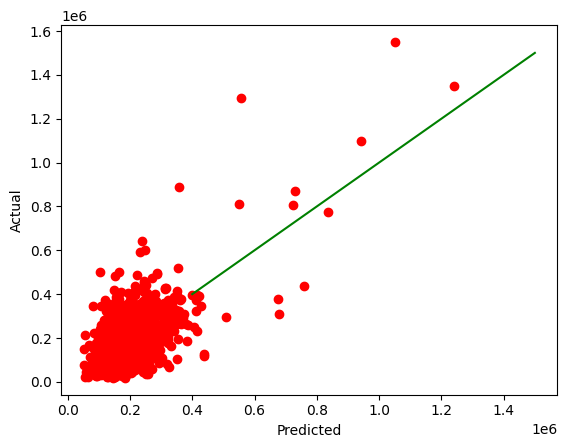

In [26]:
# Plotting graph between real and predicted values
plt.plot(y_pred,y_test,'ro')
plt.plot([400000,1500000],[400000,1500000], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
sales_data_df.head()

,Bdrms,Baths_total,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,4,2,1182,33541,2023-12-15,2023,12,160000
1,3,3,1663,7200,2023-01-10,2023,1,270000
2,3,2,1311,7412,2023-12-27,2023,12,250000
3,3,2,1826,14948,2023-07-25,2023,7,275000
4,4,3,1828,19907,2023-02-13,2023,2,275000


In [45]:
listings_data_df = pd.read_csv("original_extracted_df_MilwaukeeOnly.csv")
listings_data_df.head()

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 26th STREET,53206,43.076214,-87.946370,4,2,NaN,NaN,3920.40,0.09,sqft,NaN,1425.0,7000
1,WI,Milwaukee,North 37th STREET,53210,43.066345,-87.959490,4,2,1714.0,20.361727,3484.80,0.08,sqft,NaN,1345.0,34900
2,WI,Milwaukee,North Sherman BOULEVARD UNIT 4326,53216,43.095818,-87.966620,4,2,1500.0,83.266667,0.62,0.62,acres,NaN,NaN,124900
3,WI,Milwaukee,North 25th STREET,53205,43.056957,-87.944756,3,2,1184.0,114.020270,4356.00,0.10,sqft,132800.0,1500.0,135000
4,WI,Milwaukee,North 86th PLACE,53225,43.121850,-88.019295,3,2,1271.0,106.215578,7840.80,0.18,sqft,136300.0,1875.0,135000


In [46]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Street', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bedroom', 'Bathroom', 'Area','LotArea', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Street          33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bedroom         33 non-null     int64  
 7   Bathroom        33 non-null     int64  
 8   Area            32 non-null     float64
 9   LotArea         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [58]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'Bedrooms', 'Bathroom':'Bathrooms','Area':'FinishedSqft', 'LotArea': 'Lotsize'})
listings_data_df['Year'] = 2023
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2023
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2023
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2023
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2023
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2023


In [54]:
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      1
Lotsize           5
Price             0
MarketEstimate    7
dtype: int64

In [55]:
listings_data_df=listings_data_df.dropna(subset=['FinishedSqft','Lotsize'])
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      0
Lotsize           0
Price             0
MarketEstimate    4
dtype: int64

In [56]:
X.head()

,Bdrms,Baths_total,FinishedSqft,Lotsize,Year
0,4,2,1182,33541,2023
1,3,3,1663,7200,2023
2,3,2,1311,7412,2023
3,3,2,1826,14948,2023
4,4,3,1828,19907,2023


In [63]:
X_pred = listings_data_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales = rfm.predict(X_pred)
listings_data_df['2024 Forecasted House Price'] = y_predicted_sales
listings_data_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,Year,2024 Forecasted House Price
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2023,1178430.00
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2023,1230099.24
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2023,1178430.00
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2023,1178430.00
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2023,1094635.60
6,North 17th STREET NORTH North,Milwaukee,WI,53206,43.069004,-87.934100,3,2,902.0,0.00,140000,NaN,2023,1316030.00
7,West Eden PLACE,Milwaukee,WI,53220,42.980330,-88.002720,3,1,1156.0,7840.80,144900,157300.0,2023,1096735.60
8,South 8th STREET,Milwaukee,WI,53215,42.996044,-87.921000,3,1,1400.0,3484.80,155000,156700.0,2023,1096735.60
10,North Sherman BOULEVARD,Milwaukee,WI,53216,43.077385,-87.966930,4,2,1972.0,0.96,163500,162900.0,2023,1310209.24
11,North 78th STREET,Milwaukee,WI,53222,43.074600,-88.009514,2,1,953.0,4791.60,179000,192900.0,2023,1094635.60
